In [5]:
import _09_utility as util

dataset = util.load_large_csv('spx_features.csv')
fssr = util.fn_all_subsets(True,0,True)
fssd = util.fnsubset_to_indexdictlist(dataset.columns,fssr)
fss = []
for d in fssd:
    fss.append(list(d.keys()))
print(fss)
dataset = dataset.values
direction = 1
if(direction==1):
	arr_ext = dataset[:,1]
else:
    arr_ext = dataset[:,0]
arr_close = dataset[:,2]

Trying to load CSV file into DataFrame...
loaded chunk 1 of size: 103800164 -> 57475164
loaded chunk 2 of size: 103800164 -> 57475164
loaded chunk 3 of size: 103800164 -> 57475164
loaded chunk 4 of size: 103800164 -> 57475164
loaded chunk 5 of size: 103800164 -> 57475164
loaded chunk 6 of size: 103800164 -> 57475164
loaded chunk 7 of size: 103800164 -> 57475164
loaded chunk 8 of size: 103800164 -> 57475164
loaded chunk 9 of size: 103800164 -> 57475164
loaded chunk 10 of size: 103800164 -> 57475164
loaded chunk 11 of size: 103800164 -> 57375164
loaded chunk 12 of size: 103800164 -> 57475164
loaded chunk 13 of size: 103800164 -> 57475164
loaded chunk 14 of size: 92415380 -> 51171306
concat chunks
concatted chunks
Success.
Size of dataset:	798346306
[[0, 1, 2], [3], [151, 152, 153], [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,

In [6]:
log_normalize = True
lag_allowance = 30
generations = 10
hold_for = 15
log_normalize = True
lag_allowance = 30
generations = 10
num_eras = 1
hold_for = 21
criteria = 'r2'
elite_criteria = 1
num_parents = 10
rep_mode = 'exponential'
part_mproba = 0.000
ptrn_mproba = 0.000
using_batches = False
recomp_loaded_batches = []

In [3]:
import warnings
warnings.simplefilter("error", category=RuntimeWarning)

import _00_gene as _0
import _01_initialization as _1
import _02_evaluation as _2
import _05_reproduction as _5
import _10_era as _10

In [8]:
import _00_gene as _0
load_genes = _0.load_custom_genes(
	fss=fss,lag_allowance=lag_allowance,gene_pattern_sets=[[#0
        (412, 10, 'gt', 412, 14),(454, 8, 'gt', 464, 24)],[#1
		(45, 1, 'gt', 46, 7),(6, 24, 'gt', 6, 16)],[#2
		(199, 16, 'lt', 164, 15),(421, 19, 'lt', 410, 22)],[#3
		(412, 12, 'gt', 408, 19),(454, 8, 'gt', 476, 10)],[#4
		(411, 23, 'gt', 419, 22),(204, 25, 'lt', 154, 21)],[#5
		(411, 4, 'lt', 444, 13),(514, 7, 'lt', 494, 8)],[#6
		(423, 22, 'lt', 423, 14),(428, 5, 'lt', 428, 20)],[#7
		(212, 10, 'lt', 207, 18),(77, 13, 'lt', 68, 4)],[#8
		(440, 27, 'gt', 437, 0),(423, 12, 'lt', 423, 6)],[#9
		(438, 27, 'lt', 435, 17),(403, 6, 'gt', 401, 0)],[#10
		(466, 20, 'gt', 470, 15),(436, 10, 'lt', 440, 29)],[#11
		(514, 2, 'lt', 491, 16),(428, 23, 'gt', 428, 14),(417, 26, 'gt', 419, 17)],[
        (466, 20, 'gt', 470, 15),(436, 10, 'lt', 440, 29),(3, 10, 'lt', 3, 0)#totally custom from tos
		]])

In [9]:
arr_returns, arr_kratio = _1.collect_parallel_metrics(
    direction=direction,
	arr_close=arr_close,
	arr_ext=arr_ext,
	hold_for=hold_for,
	lag_allow=lag_allowance,
	log_normalize=log_normalize
)

In [13]:
era_args = {
		'generations'	:	1,
		'dataset'		:	dataset,
		'fss'			:	fss,
		'criteria'	:	criteria,
        'with_array'	:	False,
		'log_normalize'	:	log_normalize,
		'hold_for'	:	hold_for,
		'lag_allowance'	:	lag_allowance,
		'arr_returns'	:	arr_returns,
		'arr_kratio'	:	arr_kratio,
		'elite_criteria' : 1,
		'num_parents' : 4,
		'rep_mode' : 'exponential',
		'part_mproba' : 0.000,
		'ptrn_mproba' : 0.000,
		'use_strict_filter'	:	False,
		'strict_filter_kwargs'	:	{
			'avg_return':(0.50 / 25000),
			'tot_return':0.0,
			'profit_factor':1.0,
			'kelsch_ratio':1.0,
			'entry_frequency':0.02,
			'r2':0.6
		}}

In [7]:
new_population = _1.generate_initial_population(
	sample_size=1000,
	pattern_size=2,
	feat_idx_pool=fss,
	lag_allowance=lag_allowance,
	skew_lag_prob=False
)

In [10]:
import _05_reproduction as _5

recomp_loaded = _5.expansive_recomposition(
    population=load_genes,
    num_patterns=2
)

Expanded population: 12 -> 300 at length 2.


In [11]:
import _05_reproduction as _5

evo_pop = _5.evolutionary_branch(
	gene=load_genes[12],
    branch_size=0
)

In [45]:
import _05_reproduction as _5
from importlib import reload
reload(_5)
reload(_0)

addv_pop = _5.additive_branch(
    gene=load_genes[10]
    ,branch_size=500
    ,fss=fss
)

Expanded gene to 500 genes.


In [14]:
import _11_eon as _11

endeon = _11.autobatch_eon(
    eon_num=0,
    population=evo_pop,
    criteria=criteria,
    filter_tightening={},
    era_kwargs=era_args,
    spec_batch_size=25
)

325000  EON 1 ERA 1 GEN 1 (r2):::: AVG 0.91415, BEST 0.91415, FROM 1 GENES.
Completed batched eras...
325000  EON 2 ERA 1 GEN 1 (r2):::: AVG 0.91415, BEST 0.91415, FROM 1 GENES.


In [47]:
import copy
endeon_backup = copy.deepcopy(endeon)

In [75]:
endeon = copy.deepcopy(endeon_backup)
endeon_backup = copy.deepcopy(endeon)

In [69]:
len(endeon_backup)

70

In [15]:
import _10_era as _10

criteria = 'mkr'

endtime = _10.era(
    eon_num=0, 
	era_num	=	0,
	new_population	=	endeon,
	generations	=	1,
	dataset		=	dataset,
	fss			=	fss,
	criteria	=	criteria,
    with_array=True,
	log_normalize	=	log_normalize,
	hold_for	=	hold_for,
	lag_allowance	=	lag_allowance,
	arr_returns	=	arr_returns,
	arr_kratio	=	arr_kratio,
	elite_criteria = 1,
	num_parents = 4,
	rep_mode = 'exponential',
	part_mproba = 0.000,
	ptrn_mproba = 0.000,
	use_strict_filter	=	True,
	strict_filter_kwargs	=	{
		'avg_return':(2.75 / 25000),
		'tot_return':0.25,
		'profit_factor':1.0,
		'kelsch_ratio':2.0,
        #'mkr':0.9,
		'entry_frequency':0.01,
           'r2':0.9
}
)

325000  EON 1 ERA 1 GEN 1 (mkr):::: AVG 0.6895400285720825, BEST 0.6895400285720825, FROM 1 GENES.


(466)diff_hilo_60_15_spx[20] > (470)diff_hilo_60_240_spx[15]
(436)lolo15_spx[10] < (440)lolo240_spx[29]
(3)volume[10] < (3)volume[0]
Profit Factor: 1.2498
Average Return: 0.00011 (~0.550000011920929 on /MES == $2.75)
Average KRatio: 2.9153199195861816
MKR: 0.6895356774330139
Frequency: 0.010087600573636892
Hold For: -1
r2: 0.9141512919980588
347258
347258


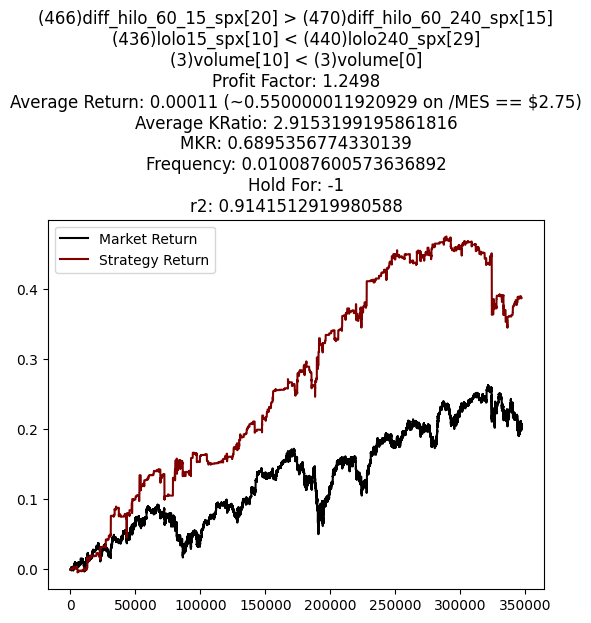

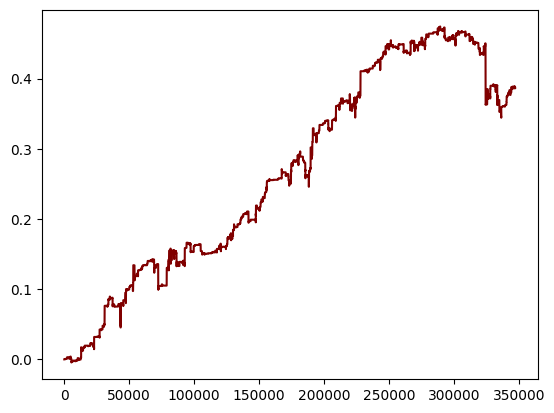

In [16]:
print(_2.show_best_gene_patterns(endtime,criteria,fssd))
_2.show_returns(endtime[0]._array_returns, arr_close=arr_close, gene_kwargs={"population":endtime,"criteria":criteria,"fss":fssd})

In [ ]:
'''new = _2.show_combined_performance(
    population=load_genes,
    arr_close=arr_close,
    arr_low=arr_low,
    arr_kratio=arr_kratio,
    arr_returns=arr_returns,
    data=dataset,
    hold_for=hold_for,
    lag_allow=lag_allowance,
    specific_data=None,
    log_normalize=log_normalize,
    criteria=criteria,
    fss=fssd
)'''